In [54]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets


import matplotlib.pyplot as plt
import seaborn as sns


from linearmodels.asset_pricing import LinearFactorModel

# DataDownload

In [2]:
data_list = get_available_datasets()
data_list

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
fama_french_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2008', end='2017-12')[0]
fama_french_factor_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01,-6.36,-0.61,4.01,2.21,2.13,0.21
2008-02,-3.09,-0.64,-0.84,0.83,-0.93,0.13
2008-03,-0.93,0.61,0.35,0.80,0.51,0.17
2008-04,4.60,-1.19,-1.09,1.68,-2.46,0.18
2008-05,1.86,3.02,-1.53,0.91,-0.06,0.18


In [4]:
fama_french_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.787000,0.164000,-0.044250,0.306250,0.070167,0.024000
std,4.472484,2.468486,2.772927,1.701614,1.464225,0.045695
min,-17.230000,-4.920000,-11.110000,-3.880000,-3.230000,0.000000
25%,-1.335000,-1.642500,-1.690000,-0.680000,-0.987500,0.000000
50%,1.235000,0.260000,-0.225000,0.410000,0.005000,0.010000
75%,3.422500,1.820000,1.270000,1.272500,0.970000,0.020000
max,11.350000,7.040000,8.210000,4.940000,3.700000,0.210000


In [5]:
fama_french_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2008', end='2017-12')[0]

In [6]:
fama_french_portfolio_data.head()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2008-01,-7.33,-4.27,-9.30,-0.18,-4.25,-5.76,-5.10,4.27,-10.97,-6.95,-13.86,-5.16,-1.47,-6.94,-1.04,-1.14,-7.23
2008-02,1.96,9.07,6.73,-3.98,-6.03,5.01,-0.90,-8.34,6.73,-1.55,-0.48,-6.40,-3.42,-3.06,-4.63,-10.81,-4.21
2008-03,2.23,-7.00,-2.82,3.30,0.02,-1.39,-0.73,1.51,-0.46,2.91,0.53,-2.55,-0.22,0.84,2.68,-3.83,0.41
2008-04,0.48,11.90,10.37,2.86,-0.45,9.79,-2.81,4.69,7.37,7.87,6.97,11.60,6.99,6.31,5.99,5.63,2.87
2008-05,1.79,11.46,3.50,3.13,1.78,3.26,2.80,0.46,8.51,4.80,6.37,-0.43,2.21,3.54,0.56,-4.09,2.91


In [7]:
fama_french_portfolio_data.describe()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000
mean,0.841250,0.248333,0.317500,1.222333,0.913667,1.035583,0.988583,1.365417,0.159500,0.994750,0.930917,0.976417,1.120583,0.594083,1.043833,0.698417,0.94300
std,3.282154,9.235868,5.899523,6.421149,6.882423,6.941719,3.582010,6.246505,9.295932,5.723656,5.961353,7.321261,5.266288,3.851818,4.080435,6.442050,4.59772
min,-12.970000,-32.760000,-16.120000,-22.170000,-25.820000,-21.930000,-9.400000,-19.560000,-32.910000,-23.030000,-20.960000,-27.810000,-15.140000,-12.590000,-14.590000,-20.910000,-17.83000
25%,-1.062500,-6.027500,-3.250000,-2.062500,-2.505000,-2.190000,-1.080000,-2.842500,-4.887500,-1.845000,-2.425000,-2.467500,-1.282500,-1.027500,-1.010000,-2.325000,-1.29750
50%,0.915000,-0.215000,0.985000,1.300000,1.275000,1.430000,1.350000,2.095000,0.710000,1.545000,1.690000,0.480000,1.660000,1.150000,0.870000,1.680000,1.73000
75%,3.152500,7.285000,4.120000,3.927500,4.565000,4.845000,3.455000,5.310000,5.142500,3.955000,4.692500,4.802500,4.530000,3.070000,3.807500,4.325000,3.49500
max,6.730000,21.940000,15.940000,23.340000,29.410000,20.110000,8.260000,17.530000,26.250000,18.820000,15.790000,32.430000,15.620000,7.860000,12.450000,17.120000,11.36000


In [8]:
with pd.HDFStore('../data/assets.h5') as store:
    prices = store['/quandl/wiki/prices'].adj_close.unstack().loc['2010':'2017']
    equities = store['/us_equities/stocks'].drop_duplicates()

In [9]:
equities.head()

,name,lastsale,marketcap,ipoyear,sector,industry
ticker,,,,,,
PIH,"1347 Property Insurance Holdings, Inc.",7.2001,43090000.0,2014.0,Finance,Property-Casualty Insurers
PIHPP,"1347 Property Insurance Holdings, Inc.",25.6200,NaN,NaN,Finance,Property-Casualty Insurers
TURN,180 Degree Capital Corp.,2.2600,70330000.0,NaN,Finance,Finance/Investors Services
FLWS,"1-800 FLOWERS.COM, Inc.",12.9000,833390000.0,1999.0,Consumer Services,Other Specialty Stores
FCCY,1st Constitution Bancorp (NJ),21.3000,178140000.0,NaN,Finance,Savings Institutions


In [10]:
 prices.head()

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.354133,NaN,12.394092,NaN,14.391425,NaN,5.472257,39.554636,27.503268,NaN,...,2.95,1.78,2.70,NaN,58.049747,NaN,NaN,2.24,NaN,12.36
2010-01-05,21.122172,NaN,13.797197,NaN,14.520197,NaN,5.313483,39.319541,27.550818,NaN,...,3.05,1.70,2.69,NaN,59.887376,NaN,NaN,2.19,NaN,12.29
2010-01-06,21.047125,NaN,13.225561,NaN,14.520197,NaN,5.102695,39.662387,27.112585,NaN,...,3.08,1.70,2.69,NaN,59.868033,NaN,NaN,2.19,NaN,12.68
2010-01-07,21.019836,NaN,13.615313,NaN,14.637558,NaN,5.291583,39.652592,27.062465,NaN,...,3.04,2.22,2.70,NaN,61.241419,NaN,NaN,2.21,NaN,14.66
2010-01-08,21.013013,NaN,13.355478,NaN,14.539757,NaN,5.354545,39.809321,27.242385,NaN,...,3.10,2.12,2.78,NaN,59.955078,NaN,NaN,2.23,NaN,14.73


In [11]:
sectors = equities.filter(prices.columns, axis='index').sector.to_dict()

In [12]:
prices = prices.filter(sectors.keys()).dropna(axis = 1 , how='all' )
prices.head()

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.354133,NaN,12.394092,NaN,14.391425,NaN,5.472257,39.554636,27.503268,NaN,...,NaN,32.810030,NaN,12.807981,2.95,1.78,NaN,NaN,NaN,12.36
2010-01-05,21.122172,NaN,13.797197,NaN,14.520197,NaN,5.313483,39.319541,27.550818,NaN,...,NaN,32.596789,NaN,13.259575,3.05,1.70,NaN,NaN,NaN,12.29
2010-01-06,21.047125,NaN,13.225561,NaN,14.520197,NaN,5.102695,39.662387,27.112585,NaN,...,NaN,33.876235,NaN,14.412582,3.08,1.70,NaN,NaN,NaN,12.68
2010-01-07,21.019836,NaN,13.615313,NaN,14.637558,NaN,5.291583,39.652592,27.062465,NaN,...,NaN,33.440060,NaN,16.026791,3.04,2.22,NaN,NaN,NaN,14.66
2010-01-08,21.013013,NaN,13.355478,NaN,14.539757,NaN,5.354545,39.809321,27.242385,NaN,...,NaN,34.486880,NaN,15.767365,3.10,2.12,NaN,NaN,NaN,14.73


# Calculate monthly return by pct_change

In [13]:
returns = prices.resample('m').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.head()

ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,38.041431,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-50.549451,-1.432330,29.702970,1.793327,9.463602,-0.220951,-2.212411,6.389776,2.659574,12.647290
2010-03,9.313414,0.272851,13.068473,7.509506,2.887175,14.847034,17.679681,7.089405,3.138374,-4.215479,...,17.777778,13.671412,8.015267,3.261816,3.605180,18.040492,17.799353,52.552553,19.689119,42.887029
2010-04,5.437627,-3.809524,3.646409,6.763926,7.585878,11.102128,4.184731,-4.771975,6.673582,23.255814,...,3.773585,11.228094,7.416961,2.888512,-1.858108,-2.664625,31.547619,16.535433,6.926407,-9.419229
2010-05,-10.755654,24.893918,-14.658849,2.194617,14.767184,-1.612471,-5.427899,-13.063628,1.658232,1.257862,...,-35.418182,-3.465347,-22.694825,-8.175997,-5.335628,-13.214885,-16.606132,-14.695946,-4.858300,-7.758621
2010-06,-12.144623,-2.491506,-14.363696,-4.808984,-2.938203,-2.082685,-9.125694,-4.797868,1.502558,-13.874292,...,-57.770270,-4.664225,22.127660,-3.361346,-7.745455,-16.654572,-9.937370,-37.029703,-3.829787,-5.899533


# Align the data for the time

In [14]:
time_ticker = returns.index

In [15]:
fama_french_portfolio_data= fama_french_portfolio_data.loc[time_ticker]
fama_french_factor_data = fama_french_factor_data.loc[time_ticker]

# Calculate excess return by minus the risk free rate

In [16]:
excess_returns = returns.sub(fama_french_factor_data.RF, axis='index')
excess_returns.head()

ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,38.041431,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-50.549451,-1.432330,29.702970,1.793327,9.463602,-0.220951,-2.212411,6.389776,2.659574,12.647290
2010-03,9.303414,0.262851,13.058473,7.499506,2.877175,14.837034,17.669681,7.079405,3.128374,-4.225479,...,17.767778,13.661412,8.005267,3.251816,3.595180,18.030492,17.789353,52.542553,19.679119,42.877029
2010-04,5.427627,-3.819524,3.636409,6.753926,7.575878,11.092128,4.174731,-4.781975,6.663582,23.245814,...,3.763585,11.218094,7.406961,2.878512,-1.868108,-2.674625,31.537619,16.525433,6.916407,-9.429229
2010-05,-10.765654,24.883918,-14.668849,2.184617,14.757184,-1.622471,-5.437899,-13.073628,1.648232,1.247862,...,-35.428182,-3.475347,-22.704825,-8.185997,-5.345628,-13.224885,-16.616132,-14.705946,-4.868300,-7.768621
2010-06,-12.154623,-2.501506,-14.373696,-4.818984,-2.948203,-2.092685,-9.135694,-4.807868,1.492558,-13.884292,...,-57.780270,-4.674225,22.117660,-3.371346,-7.755455,-16.664572,-9.947370,-37.039703,-3.839787,-5.909533


In [19]:
fama_french_portfolio_data.head()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
date,,,,,,,,,,,,,,,,,
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.06,7.24,3.22,11.14,5.56,7.51,3.27,5.55,12.04,5.30,7.76,8.88,9.00,3.13,6.47,8.17,6.44
2010-04,-1.28,-0.84,4.32,4.76,6.88,2.49,-1.96,10.87,-2.63,3.44,4.82,6.76,3.07,2.85,1.36,0.93,1.73
2010-05,-4.81,-7.95,-10.10,-5.98,-5.51,-10.56,-6.27,-8.08,-7.01,-8.99,-8.09,-6.88,-7.60,-6.29,-5.71,-9.21,-7.88
2010-06,-1.90,-7.08,-6.15,-9.68,-8.75,-7.96,-0.10,-14.15,-13.18,-6.37,-5.97,-7.68,-7.30,-0.69,-9.17,-7.36,-5.68


# Factor Exposures

In [86]:
betas = []
for industry in fama_french_portfolio_data:
    reg = LinearRegression().fit(fama_french_factor_data, 
                                 fama_french_portfolio_data.loc[fama_french_factor_data.index, industry])
    betas.append(reg.coef_)

In [88]:
betas = pd.DataFrame(betas, 
                     columns=fama_french_factor_data.columns, 
                     index=fama_french_portfolio_data.columns)


In [93]:
betas

,Mkt-RF,SMB,HML,RMW,CMA,RF
Food,0.689757,-0.310910,-0.348278,0.318810,0.464934,-7.907804
Mines,1.289542,0.182132,0.170309,0.148038,0.676612,44.173251
Oil,1.032275,0.164019,0.631724,-0.019629,0.352325,8.510651
Clths,0.970872,0.364893,-0.121702,0.644899,-0.078940,-8.546857
Durbl,1.188816,0.532221,0.095462,0.582056,-0.197899,-22.742889
Chems,1.346629,0.178964,0.178778,0.148451,-0.208109,11.994233
Cnsum,0.766379,-0.343506,-0.549932,-0.043338,0.557699,-11.301615
Cnstr,1.110815,0.426746,0.080027,-0.035844,0.196105,10.504084
Steel,1.454138,0.418422,0.378418,0.136911,0.550231,35.801619
FabPr,1.067318,0.464003,-0.041906,0.154200,0.203336,1.697252


# Risk Premia

In [103]:
lambdas = []
for period in fama_french_portfolio_data.index:
    reg = LinearRegression(fit_intercept = False).fit(betas,
                                 fama_french_portfolio_data.loc[period, betas.index])
    lambdas.append(reg.coef_)

In [104]:
lambdas = pd.DataFrame(lambdas, 
                       index=fama_french_portfolio_data.index,
                       columns=betas.columns.tolist())

lambdas

,Mkt-RF,SMB,HML,RMW,CMA,RF
date,,,,,,
2010-02,3.621987,5.160907,-2.633877,2.279293,-1.657973,0.066623
2010-03,6.156525,-0.299246,-0.902310,2.909598,-2.277965,0.049798
2010-04,2.087560,8.190156,-1.400290,-2.373567,-0.255500,-0.099376
2010-05,-7.814425,3.092170,-1.607551,1.507772,-0.801590,0.037863
2010-06,-5.258225,-5.776449,-0.877367,-2.195879,0.484424,-0.028809
...,...,...,...,...,...,...
2017-08,0.178409,0.162241,-6.261036,-3.888302,-1.959981,0.107177
2017-09,3.413377,6.472794,3.953038,-4.802464,1.702609,-0.105341
2017-10,2.252273,-2.531290,-1.949149,2.026427,-5.495516,0.103703


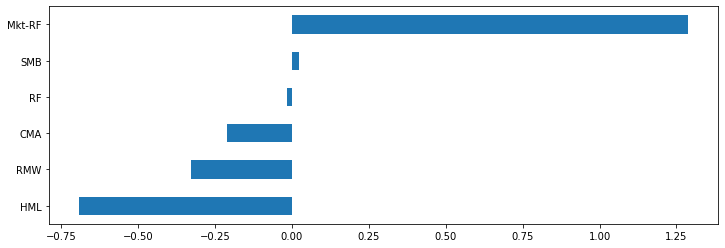

In [107]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
plt.show();

In [108]:
lambdas.mean().div(lambdas.std())

Mkt-RF    0.358829
SMB       0.006075
HML      -0.202881
RMW      -0.108785
CMA      -0.072998
RF       -0.175825
dtype: float64

[-0.6918789816761529,
 -0.32809549018217676,
 -0.2108198691010655,
 -0.015132752994480334,
 0.023617722998458646,
 1.286955072851169]

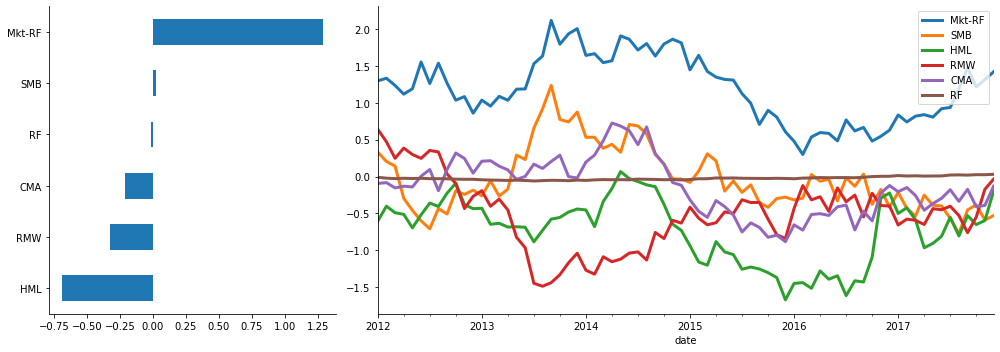

In [152]:
window = 24 
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
lambdas.mean().sort_values().plot.barh(ax=ax1)
lambdas.rolling(window).mean().dropna().plot(lw=3,
                                             figsize=(14, 5),
                                             ax=ax2)
sns.despine()
plt.tight_layout()

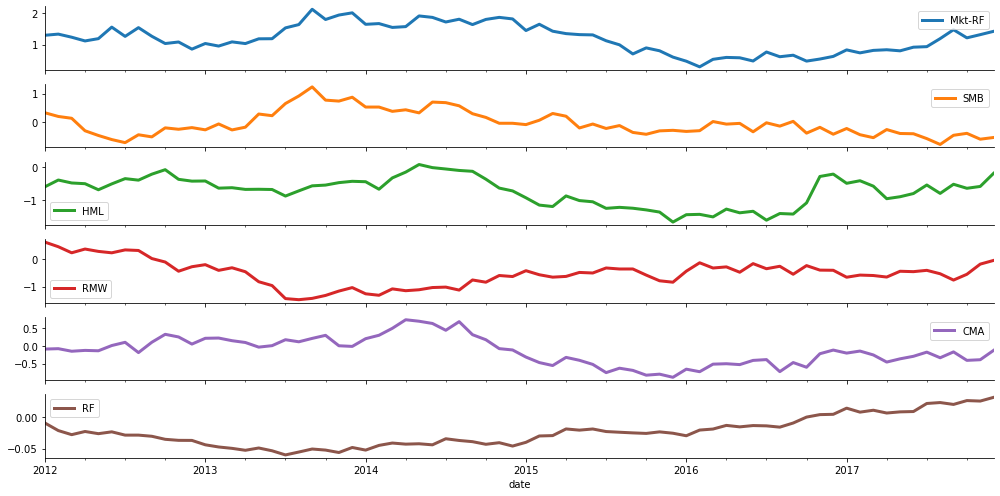

In [153]:
window = 24 
lambdas.rolling(window).mean().dropna().plot(lw=3,
                                             figsize=(14, 7),
                                             subplots=True)
sns.despine()
plt.tight_layout()